In [16]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [10]:
# Carichiamo i dati dal CSV
dati = pd.read_csv("T:\Python\Videogioco\dsAccelerazione.csv")
X = dati[["x", "y", "z"]].values  #values per ottenere dei vettori numpy con i valori
y = dati["tipo"].values
print(X)
print(y)

[[ -64.  344.  776.]
 [-600.  344.  764.]
 [-556.  408.  736.]
 ...
 [-448. -816.  436.]
 [-276. -760.  156.]
 [-380. -992.  252.]]
['av' 'av' 'av' ... 'dr' 'dr' 'dr']


<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\tomma\AppData\Local\Temp\ipykernel_2564\2133463716.py:2: SyntaxWarning: invalid escape sequence '\P'
  dati = pd.read_csv("T:\Python\Videogioco\dsAccelerazione.csv")


In [18]:
dati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       4000 non-null   float64
 1   y       4000 non-null   float64
 2   z       4000 non-null   float64
 3   tipo    4000 non-null   object 
dtypes: float64(3), object(1)
memory usage: 125.1+ KB


In [21]:
dati["tipo"].value_counts()

tipo
av    1400
dr    1400
id    1200
Name: count, dtype: int64

In [ ]:
# Dividiamo i dati in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Creiamo il modello e lo alleniamo
modello = tree.DecisionTreeClassifier(max_depth=3, ccp_alpha = 0.01) #alpha > 0 sfoltisce l'albero per farlo più semplice
modello.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=3)

In [26]:
# Facciamo previsioni sui dati di test
y_pred = modello.predict(X_test)

# Valutiamo il modello con Accuracy (Accuratezza) = Percentuale di predizioni corrette
acc = accuracy_score(y_test, y_pred)
print(f"Accuratezza di training: {modello.score(X_train, y_train):.2f}")
print(f"Accuratezza del modello: {acc:.2f}")

Accuratezza di training: 0.63
Accuratezza del modello: 0.64


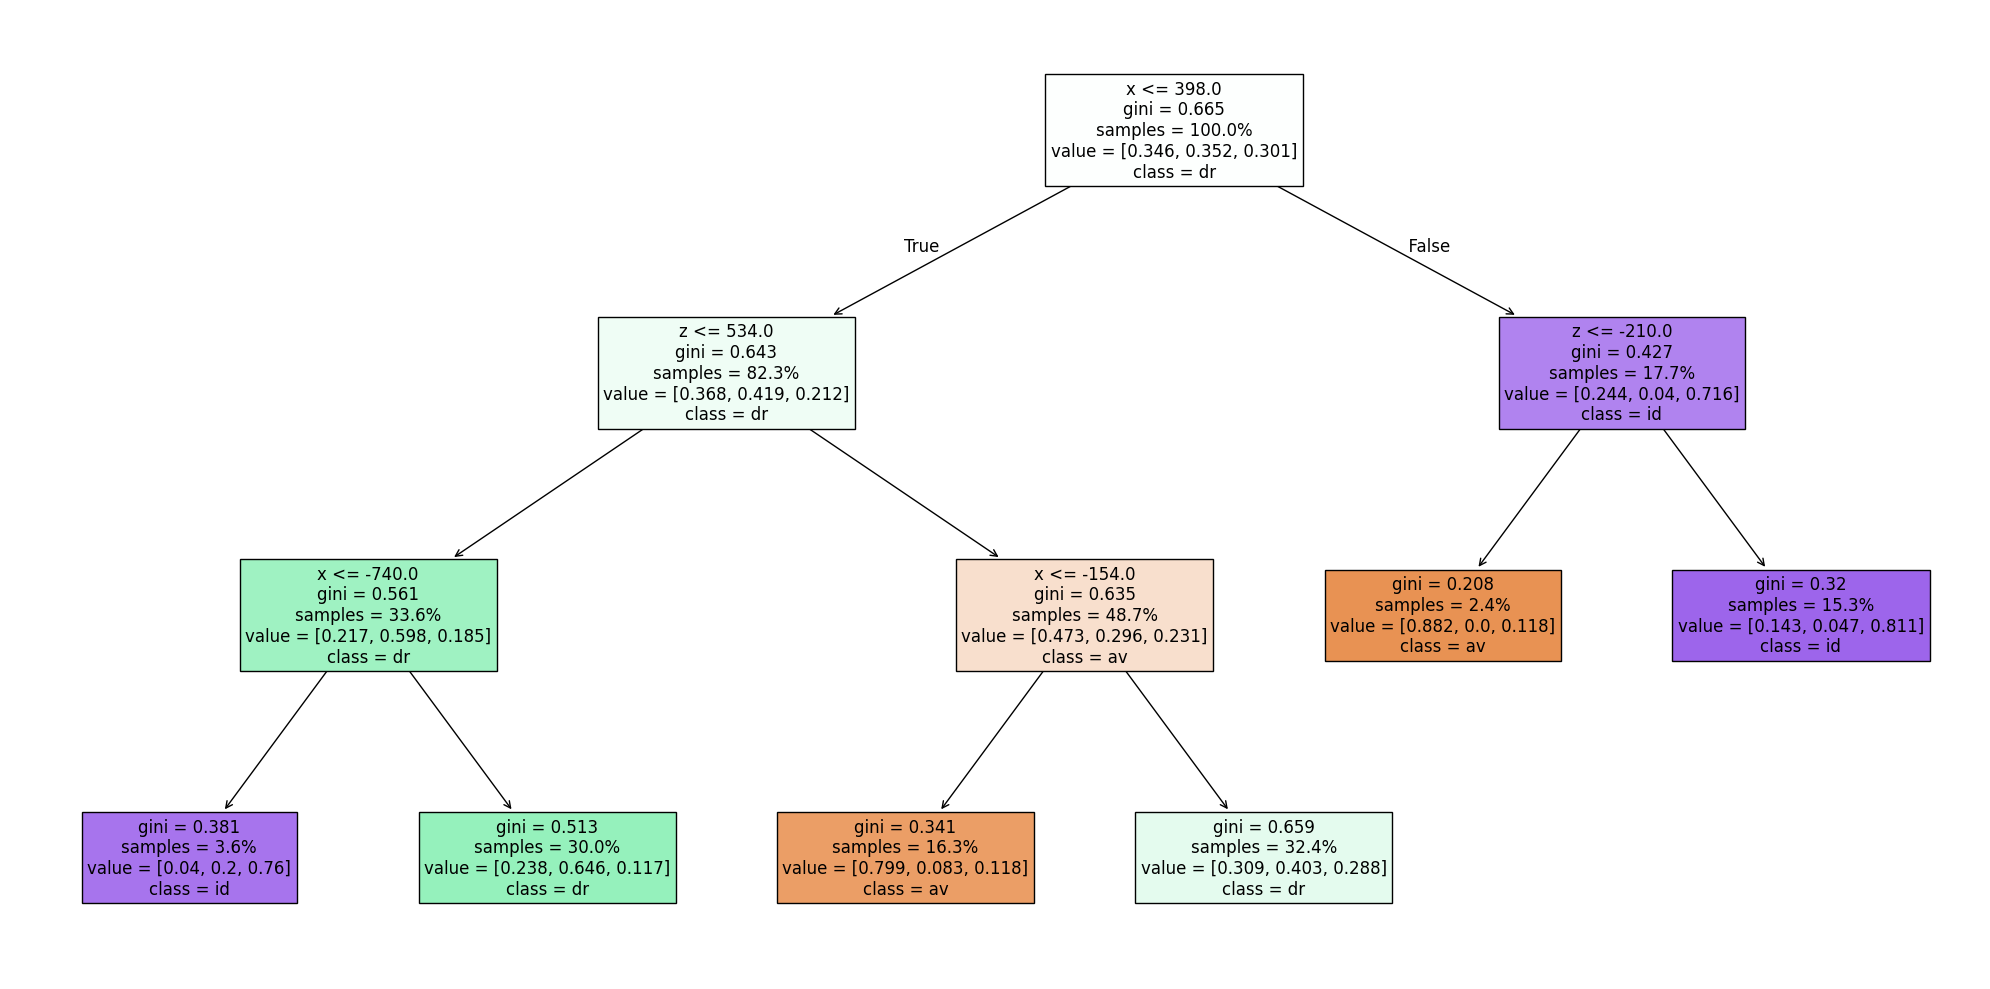

In [28]:
plt.figure(figsize=(20,10))
tree.plot_tree(modello, 
        feature_names=dati.columns.tolist(),   # Nomi delle feature
        class_names=modello.classes_,       # Nomi delle classi (in ordine alfabetico)  ['av' 'id' 'dr']
        filled=True,                        # Colora i nodi più o meno intensamente
        fontsize=12,                        # Dimensione font
        proportion=True)
plt.tight_layout() #per ottimizzare lo spazio
plt.show()

In [15]:
import joblib

# Salvataggio del modello
joblib.dump(modello, 'modello_movimenti.joblib')


['modello_movimenti.joblib']

# Esempio di Utilizzo in Un Altro Script (in un file separato)

In [ ]:
# Caricamento del modello salvato
modello_caricato = joblib.load('modello_movimenti.joblib')

In [ ]:
# Esempio di nuovo movimento da classificare
nuovo_movimento = [-572.0,328.0,784.0]  # x, y e z

risultato =  modello_caricato.predict([nuovo_movimento])  # si aspetta un un array con forma (n_samples, n_features)  
print("Classe predetta:", risultato[0])

probabilita = modello_caricato.predict_proba([nuovo_movimento])
print("Probabilità:", probabilita[0])


Classe predetta: margherita
Probabilità: [0.025 0.975 0.   ]
